## Dominik Adamczyk
### Mownit Lab2 rozwiązania

### Zadanie 1 (1p)

Porównać w języku Julia reprezentację bitową liczby 1/3 dla `Float16`, `Float32`, `Float64` oraz liczby, 
która jest inicjalizowana jako `Float16`, a potem rzutowana na `Float64`.

In [2]:
println("Float16: ")
println(bitstring(Float16(1/3)))
println("Float32: ")
println(bitstring(Float32(1/3)))
println("Float64: ")
println(bitstring(Float64(1/3)))
println("Float16 casted to Float64: ")
println(bitstring(Float64(Float16(1/3))))

Float16: 
0011010101010101
Float32: 


00111110101010101010101010101011
Float64: 


0011111111010101010101010101010101010101010101010101010101010101
Float16 casted to Float64: 
0011111111010101010101000000000000000000000000000000000000000000


### Zadanie 2 (2p)

Zbadać, jak zmienia się odległość między kolejnymi liczbami zminnoprzecinkowymi 
reprezentowanymi w komputerze za pomocą języka Julia. 
Narysować wykres używając Plots zależności odległości od wartości liczby dla zakresu  od 1.0 do 1000000.0.

In [3]:
values = [i for i in 1.0:1000:1000000.0]
epsilons = map(val -> eps(val), values)

1000-element Vector{Float64}:
 2.220446049250313e-16
 1.1368683772161603e-13
 2.2737367544323206e-13
 4.547473508864641e-13
 4.547473508864641e-13
 9.094947017729282e-13
 9.094947017729282e-13
 9.094947017729282e-13
 9.094947017729282e-13
 1.8189894035458565e-12
 ⋮
 1.1641532182693481e-10
 1.1641532182693481e-10
 1.1641532182693481e-10
 1.1641532182693481e-10
 1.1641532182693481e-10
 1.1641532182693481e-10
 1.1641532182693481e-10
 1.1641532182693481e-10
 1.1641532182693481e-10

In [4]:
using Plots

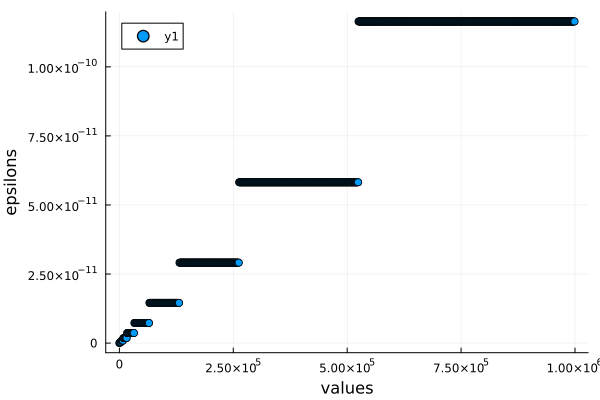

In [5]:
scatter(values, epsilons, xlabel="values", ylabel="epsilons")

### Zadanie 3 (2p)

Jedną z bibliotek numerycznych, jaką dodatkowo będziemy używać na zajęciach jest <a href="http://www.gnu.org/software/gsl/gsl.html">GSL</a> (język C). Opis <a href="https://www.gnu.org/software/gsl/doc/html/usage.html"> jak używać </a>. Korzystając ze <a href="https://www.gnu.org/software/gsl/doc/html/ieee754.html"> wsparcia dla wyświetlania reprezentacji liczb zmiennoprzecinkowych</a> zobaczyć jak zmienia się cecha i mantysa dla coraz mniejszych liczb. Zaobserwować, kiedy matysa przestaje być znormalizowana i dlaczego?

Kod załączyć jako komórka Markdown sformatowana jako C ([link](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#code)). Wynik także jako Markdown (kod albo fragment zrzutu ekranu).

#### Code in C:
```C
#include <stdio.h>
#include <gsl/gsl_ieee_utils.h>

int
main (void)
{   
    gsl_ieee_env_setup();

    float f = 1000.0/(19.3*1e30);

    printf("Example 1:\n Initail number = %f, divided by 2.0\n", f);
    while (f > 0){
        f /= 2.0;
        gsl_ieee_printf_float(&f);
        printf("\n");
    }

    f = 1000.0/(11.7*1e31);
    printf("\n\nExample 2:\n Initail number = %f, divided by 3.7\n", f);
    while (f > 0){
        f /= 3.7;
        gsl_ieee_printf_float(&f);
        printf("\n");
    }
    return 0;
}
```

#### makefile:
```makefile
all:
	gcc -Wall -I/usr/local/include -c ex3.c
	gcc ex3.o -lgsl -lgslcblas -lm -o ex3

prepare:
	LD_LIBRARY_PATH=/usr/local/lib
	export LD_LIBRARY_PATH

run:
	make all
	rm -f ex3.o
	./ex3 > report.txt

```

#### Output:
``` py
Example 1:
 Initail number = 0.000000, divided by 2.0
 1.00000110101110011011110*2^-95
 1.00000110101110011011110*2^-96
 1.00000110101110011011110*2^-97
 1.00000110101110011011110*2^-98
 1.00000110101110011011110*2^-99
 1.00000110101110011011110*2^-100
 1.00000110101110011011110*2^-101
 1.00000110101110011011110*2^-102
 1.00000110101110011011110*2^-103
 1.00000110101110011011110*2^-104
 1.00000110101110011011110*2^-105
 1.00000110101110011011110*2^-106
 1.00000110101110011011110*2^-107
 1.00000110101110011011110*2^-108
 1.00000110101110011011110*2^-109
 1.00000110101110011011110*2^-110
 1.00000110101110011011110*2^-111
 1.00000110101110011011110*2^-112
 1.00000110101110011011110*2^-113
 1.00000110101110011011110*2^-114
 1.00000110101110011011110*2^-115
 1.00000110101110011011110*2^-116
 1.00000110101110011011110*2^-117
 1.00000110101110011011110*2^-118
 1.00000110101110011011110*2^-119
 1.00000110101110011011110*2^-120
 1.00000110101110011011110*2^-121
 1.00000110101110011011110*2^-122
 1.00000110101110011011110*2^-123
 1.00000110101110011011110*2^-124
 1.00000110101110011011110*2^-125
 1.00000110101110011011110*2^-126
 0.10000011010111001101111*2^-126
 0.01000001101011100111000*2^-126
 0.00100000110101110011100*2^-126
 0.00010000011010111001110*2^-126
 0.00001000001101011100111*2^-126
 0.00000100000110101110100*2^-126
 0.00000010000011010111010*2^-126
 0.00000001000001101011101*2^-126
 0.00000000100000110101110*2^-126
 0.00000000010000011010111*2^-126
 0.00000000001000001101100*2^-126
 0.00000000000100000110110*2^-126
 0.00000000000010000011011*2^-126
 0.00000000000001000001110*2^-126
 0.00000000000000100000111*2^-126
 0.00000000000000010000100*2^-126
 0.00000000000000001000010*2^-126
 0.00000000000000000100001*2^-126
 0.00000000000000000010000*2^-126
 0.00000000000000000001000*2^-126
 0.00000000000000000000100*2^-126
 0.00000000000000000000010*2^-126
 0.00000000000000000000001*2^-126
 0


Example 2:
 Initail number = 0.000000, divided by 3.7
 1.01110110110100011011111*2^-99
 1.10010101001101011100011*2^-101
 1.10110110000100001001111*2^-103
 1.11011001100101010110110*2^-105
 1.11111111111110110111110*2^-107
 1.00010100101111110100101*2^-108
 1.00101011001011111010101*2^-110
 1.01000011011100011100110*2^-112
 1.01011101101010110111010*2^-114
 1.01111010000001010111011*2^-116
 1.10011000101010111111011*2^-118
 1.10111001110011101010101*2^-120
 1.11011101101000010010011*2^-122
 1.00000010001011011001100*2^-123
 1.00010111000111001000100*2^-125
 0.10010110110111101111111*2^-126
 0.00101000110001101010011*2^-126
 0.00001011000001010100001*2^-126
 0.00000010111110101000000*2^-126
 0.00000000110011100001010*2^-126
 0.00000000001101111011001*2^-126
 0.00000000000011110000111*2^-126
 0.00000000000001000001001*2^-126
 0.00000000000000010001101*2^-126
 0.00000000000000000100110*2^-126
 0.00000000000000000001010*2^-126
 0.00000000000000000000011*2^-126
 0.00000000000000000000001*2^-126
 0
```

#### Wnioski:
* W pierwszym przykładzie mantysa nie ulega zmianie, aż do momentu, gdy cecha osiągnie wartość -126. To, że mantysa jest stała wynika z dzielenia poprzedniej liczby przez 2, co odpowiada zmniejszeniu cechy o 1 (czyli przesunięciu liczby w prawo o jeden bit) - jest to skutek binarnej reprezentacji liczb w komputerze.
* Gdy cecha osiągnie wartość -126 dochodzi do denormalizacji mantysy - jej początkowa wartość przestaje wynosić 1. Dzieje się tak, gdyż -126 jest minimalną liczbą z zakresu cechy dla typu float w języku C. Chcąc przedstawić mniejsze liczby niż 1.0*2^-126 wychodzimy poza zakres cechy (efekt niedomiaru), więc konieczne jest manipulowanie mantysą (w tym wypadku przesuwanie jej w prawo o jeden bit z każdym dzieleniem).
* Drugi przykład obrazuje to samo zjawisko, z tą różnicą, że za każdym razem mantysa dodatkowo zmienia swoje cyfry, gdzyż dzielenie wykonywane jest przez liczbę inną niż potęga dwójki.

### Zadanie 4 (4p)

Na przykładzie wybranego algorytmu niestabilnego numerycznie: 
1. Pokazać, że działa źle.
2. Pokazać które konkretnie działania powodują zwiększenie błędu (np. dzielenie przez małą liczbę, cancellation).
3. Zademonstować wersję stabilną.

Nie wolno pokazywać przykładów z wykładu (lub bardzo podobnych)!

Wszystkie punkty przedstawić w postaci notatnika Julii.

### Rozwiązanie:
W zadaniu pokazuję dwa przykłady, pierwszy prezentuje catastrophic cancellation która może zaburzyć wyniki rozwiązania równania kwadratowego, natomiast drugi pokazuje jak arytmetyka zmiennopozycyjna może powodować utratę informacji podczas tak prostych operacji jak sumowanie liczb.

Rozwiązania i przykłady pokazane są na typie Float16 zgodnym ze standardem IEEE 754 w celu większej czytelności, jednak analogiczne problemy (oczywiście przeskalowane) spotykane są dla innych typów Float.

#### Przykład 1

Poniżej znajduje się funkcja obliczająca i wypisująca miejsca zerowe równania kwadratowego o zadanych współczynnikach a, b, c. Jeżeli obliczona delta takiego wyrażenia jest bliska zera, (czyli $b^2$ ma wartość zbliżoną do $4ac$ może dojść do catastrophic cancellation), czego rezultatem będą niepoprawne wyniki

In [30]:
function solve_quadratic(a, b, c)
    delta = b * b - 4 * a * c

    if delta >= 0 
        deltasq = sqrt(delta)
        println("x1:")
        println((-b + deltasq) / (2 * a))

        println("x2:")
        println((-b - deltasq) / (2 * a))
    else
        println("No real solutions")
    end
end


solve_quadratic (generic function with 1 method)

In [31]:
a = Float16(10.001)
b = Float16(12.499)
c = Float16(3.905)


Float16(3.904)

In [32]:
println("Rozwiązanie (Float16):")
solve_quadratic(a, b, c)
print("Rozwiązanie (Float64):")
a2 = Float64(10.001)
b2 = Float64(12.499)
c2 = Float64(3.905)
solve_quadratic(a2, b2, c2)

Rozwiązanie (Float16):
x1:
-0.6074
x2:
-0.6426
Rozwiązanie (Float64):x1:


-0.6200452173499468
x2:
-0.6297298051478036


Rozwiązania dla Float64 są poprawne, podczas gdy rozwiązania dla Float16 nie są poprawne, różnią się od rozwiązań dokładnych o około $1.5\%-2.0\%$

In [33]:

println("a: ", bitstring(a))
println("b: ", bitstring(b))
println("c: ", bitstring(c))

println("Wartości dwóch iloczynów składających się na deltę\nsą bardzo bliskie sobie, co widać dzięki reprezentacji binarnej:\n")
println("b**2:     ", bitstring(b * b))
println("4*a*c:    ", bitstring(4 * a * c))

println("b**2-4ac: ", bitstring(b*b-4*a*c))

println("Odejmowanie tych liczb powoduje utratę danych,\nco w następnej części obliczeń prowadzi do niepoprawnych wyników")

a: 0100100100000000
b: 0100101001000000
c: 0100001111001111
Wartości dwóch iloczynów składających się na deltę
są bardzo bliskie sobie, co widać dzięki reprezentacji binarnej:

b**2:     0101100011100010
4*a*c:    0101100011100001
b**2-4ac: 0011000000000000
Odejmowanie tych liczb powoduje utratę danych,
co w następnej części obliczeń prowadzi do niepoprawnych wyników


Rozwiązaniem tego problemu jest zastosowanie typów zmiennoprzecinkowych o większej precyzji. Alternatywnie można zaimplementować inny algorytm obliczający miejsca zerowe.

Poniżej znajduje się implementacja algorytmu znajdującego miejsce zerowe metodą Newtona. Dla funkcji kwadratowej metoda Newtona zwróci jedno miejsce zerowe (o ile takie istnieje), kolejne uzyskiwane jest przy pomocy wzoru Vietea: $x_1x_2 = \frac{c}{a}$. 

Algorytm nie rozpatruje wszystkich przypadków (brak miejsc zerowych, jedno miejsce zerowe), jednak jego postać jest wystarczająca do wykonania przykładu.

Algorytm operuje na tych samych liczbach typu Float16 w celu zachowania tych samych warunków zadania.

In [69]:
function quadratic_newton(a::Float16, b::Float16, c::Float16)
    x = Float16(0)
    tolerance = Float16(1e-4)
    max_iterations = 10000
    f(x) = a*x^2 + b*x + c
    f_prime(x) = 2*a*x + b
    iteration = 0
    while iteration < max_iterations && abs(f(x)) > tolerance
        x = x - f(x) / f_prime(x)
        iteration += 1
    end

    if iteration >= max_iterations
        println("Max iterations, solution may not be accurate")
    end

    x2 = c / (a * x)

    println("x1:")
    println(x)
    println("x2:")
    println(x2)

end

quadratic_newton (generic function with 3 methods)

In [70]:
quadratic_newton(a, b, c)

x1:
-0.6216
x2:
-0.6284


Uzyskany w ten sposób wynik jest lepszy od tego z poprzedniej metody. Należy jednak mieć na uwadze, że metoda Newtona w przypadku pewnych danych może być również nieodpowiednia, szczególnie jeżeli operacje będą przeprowadzane na Float16. 

#### Przykład 2

Poniżej znajduje się funkcja naiwnego sumowania tablicy - wynik jest akumulowany w zmiennej total, co w rezultacie może powodować błąd. Gdy liczba total stanie się zbyt duża 

In [5]:
function sum_array(arr)
    total = 0
    for val in arr
        total += val
    end
    return total
end

sum_array (generic function with 1 method)

Tworzona zostaje tablica z dużą ilością małych (jak na format Float(16) wartości)

In [ ]:
arr = rand(Float16, 500000)
arr /= Float16(1e4)
sum(arr)

Float16(24.92)

In [ ]:
sum_array(arr)

Float16(0.25)

Suma zwrócona przez funkcję systemową wynosi około 25, jednak naiwny algorytm sumowania uzyskuje wynik 0.25. Wynika to z faktu, że akumulator algorytmu naiwnego staje się zbyt dużą liczbą, więc dodawanie do niego niewielkich wartości nie powoduje zmiany w akumulatorze. Pokazuje to poniższy pryzkład

In [ ]:
x = Float16(1)
println("1.0:         ", bitstring(x))
s = Float16(1e-6)
println("1e-6:        ",  bitstring(s))
xs = x + s 
println("1.0 + 1e-6:  ", bitstring(xs))
println("Suma tych dwóch liczb jest równa pierwszej liczbie.")
println("1.0 == 1.0 + 1e-6:     ", x == xs)

1.0:         0011110000000000
1e-6:        0000000000010001
1.0 + 1e-6:  0011110000000000
Suma tych dwóch liczb jest równa pierwszej liczbie.
1.0 == 1.0 + 1e-6:     true


Rozwiązaniem jest implementacja lepszych algorytmów sumujących tablice, bądź użycie zaimplementowanych w języku funkcji. Przykładem takich algorytmów jest:
* Pairwise summation -> algorytm wykorzystywany natywnie w Julii i NumPy
* Kahan summatin -> algorytm zaimplementowany poniżej

Obydwa algorytmy zapewniają o wiele lepszą dokładność obliczeń

In [ ]:
function kahan_sum(arr::AbstractVector{T}) where T<:Number
    s = zero(T)
    c = zero(T)
    for i in eachindex(arr)
        y = arr[i] - c
        t = s + y
        c = (t - s) - y
        s = t
    end
    s
end

kahan_sum (generic function with 1 method)

In [ ]:
println("Kahan summation: ", kahan_sum(arr))
println("Pairwise summation (from Julia library): ", sum(arr))

Kahan summation: 25.02
Pairwise summation (from Julia library): 24.92


Algorytmy dają zbliżone do siebie wyniki